# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 10.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.1 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp20 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [5]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [6]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1323298185926877189
1323298185964670977
1323298185834598400
1323298186006581250
1323298186174234624
1323298186258116608
1323298186228862977
1323298186283417602
1323298186140798977
1323298186501345285
1323298186488733696
1323298186509901827
1323298186337914881
1323298186719567878
1323298186719563785
1323298186795110401
1323298186967089152
1323298186971283456
1323298187159998464
1323298186920865795
1323298187210330112
1323298187139047424
1323298187331907591
1323298187151593473
1323298187013197826
1323298187281616901
1323298187449303040
1323298187550011393
1323298187537506304
1323298187550040065
1323298187688497155
1323298187751337992
1323298187789004800
1323298187885465603
1323298187915001857
1323298188032462848
1323298188011442177
1323298188082774016
1323298188091150337
1323298188019847168
1323298188304945152
1323298188296671234
1323298188187631617
1323298188162334720
1323298188342792192
1323298188464410624
1323298188460109824
1323298188611231745
1323298188414095360
1323298188686622720


1323298219284172800
1323298219242213376
1323298219640692736
1323298219661488130
1323298219720396802
1323298219753918465
1323298219904897026
1323298219888201730
1323298220215308288
1323298220257103872
1323298220341104640
1323298220332691457
1323298220408295435
1323298220424994817
1323298220395565057
1323298220349468675
1323298220378853377
1323298220483760128
1323298220471189504
1323298220500570113
1323298220408213504
1323298220513120261
1323298220609622019
1323298220764729347
1323298220831768577
1323298220856979457
1323298220844425218
1323298220936757248
1323298221012230146
1323298221116985344
1323298221066723329
1323298221146386436
1323298221142106113
1323298221083545600
1323298221368741889
1323298221406511104
1323298221544869889
1323298221746257920
1323298222777929729
1323298222614450179
1323298222786269190
1323298222937460737
1323298223226839041
1323298223193247745
1323298223276978176
1323298223188930560
1323298223289733126
1323298223289761792
1323298223369441280
1323298223398752256


1323298253899669504
1323298253941567490
1323298254004641794
1323298253937455109
1323298253908013056
1323298254155513867
1323298254101118978
1323298254398742528
1323298254369554432
1323298254377857024
1323298254407294976
1323298254465994755
1323298254545735680
1323298254709088256
1323298254725865472
1323298254805676032
1323298254818283524
1323298254977601536
1323298254910558210
1323298255011254274
1323298255032254466
1323298255053025280
1323298255153889281
1323298255170539520
1323298255191609345
1323298255225131011
1323298256353398785
1323298256437260288
1323298256458272768
1323298256328269829
1323298256496005121
1323298256416223232
1323298255103528962
1323298256504250368
1323298256126881792
1323298256491667458
1323298256441364480
1323298256475115523
1323298256655450120
1323298256571437056
1323298256575729667
1323298256806387715
1323298256818970631
1323298256886075401
1323298256844185600
1323298256944877568
1323298256927907841
1323298257003515907
1323298256835825670
1323298257045508096


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 02 16:18:40 +0000 2020'
'Mon Nov 02 16:16:33 +0000 2020'
'Mon Nov 02 16:15:26 +0000 2020'
'Mon Nov 02 16:13:50 +0000 2020'
'Mon Nov 02 16:13:24 +0000 2020'
'Mon Nov 02 16:13:05 +0000 2020'
'Mon Nov 02 16:11:48 +0000 2020'
'Mon Nov 02 16:10:50 +0000 2020'
'Mon Nov 02 16:09:48 +0000 2020'
'Mon Nov 02 16:09:42 +0000 2020'
'Mon Nov 02 16:08:32 +0000 2020'
'Mon Nov 02 16:07:02 +0000 2020'
'Mon Nov 02 16:06:55 +0000 2020'
'Mon Nov 02 16:06:43 +0000 2020'
'Mon Nov 02 16:05:33 +0000 2020'
'Mon Nov 02 16:05:19 +0000 2020'
'Mon Nov 02 16:04:53 +0000 2020'
'Mon Nov 02 16:04:41 +0000 2020'
'Mon Nov 02 16:04:13 +0000 2020'
'Mon Nov 02 16:03:24 +0000 2020'
'Mon Nov 02 16:03:04 +0000 2020'
'Mon Nov 02 16:02:25 +0000 2020'
'Mon Nov 02 16:02:21 +0000 2020'
'Mon Nov 02 16:01:04 +0000 2020'
'Mon Nov 02 16:01:02 +0000 2020'
'Mon Nov 02 16:00:49 +0000 2020'
'Mon Nov 02 16:00:42 +0000 2020'
'Mon Nov 02 16:00:24 +0000 2020'
'Mon Nov 02 16:00:19 +0000 2020'
'Mon Nov 02 15:58:56 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 02 15:39:40 +0000 2020'
'Mon Nov 02 15:38:31 +0000 2020'
'Mon Nov 02 15:38:00 +0000 2020'
'Mon Nov 02 15:37:50 +0000 2020'
'Mon Nov 02 15:37:42 +0000 2020'
'Mon Nov 02 15:37:33 +0000 2020'
'Mon Nov 02 15:37:23 +0000 2020'
'Mon Nov 02 15:37:04 +0000 2020'
'Mon Nov 02 15:36:59 +0000 2020'
'Mon Nov 02 15:36:10 +0000 2020'
'Mon Nov 02 15:35:25 +0000 2020'
'Mon Nov 02 15:35:02 +0000 2020'
'Mon Nov 02 15:34:52 +0000 2020'
'Mon Nov 02 15:34:03 +0000 2020'
'Mon Nov 02 15:33:58 +0000 2020'
'Mon Nov 02 15:33:09 +0000 2020'
'Mon Nov 02 15:33:01 +0000 2020'
'Mon Nov 02 15:32:48 +0000 2020'
'Mon Nov 02 15:32:43 +0000 2020'
'Mon Nov 02 15:31:19 +0000 2020'
'Mon Nov 02 15:30:16 +0000 2020'
'Mon Nov 02 15:29:20 +0000 2020'
'Mon Nov 02 15:28:37 +0000 2020'
'Mon Nov 02 15:28:09 +0000 2020'
'Mon Nov 02 15:27:47 +0000 2020'
'Mon Nov 02 15:27:47 +0000 2020'
'Mon Nov 02 15:26:19 +0000 2020'
'Mon Nov 02 15:26:13 +0000 2020'
'Mon Nov 02 15:25:59 +0000 2020'
'Mon Nov 02 15:25:54 +0000 2020'
'Mon Nov 0

'Mon Nov 02 12:11:34 +0000 2020'
'Mon Nov 02 12:02:05 +0000 2020'
'Mon Nov 02 11:58:51 +0000 2020'
'Mon Nov 02 11:54:11 +0000 2020'
'Mon Nov 02 11:53:40 +0000 2020'
'Mon Nov 02 11:52:20 +0000 2020'
'Mon Nov 02 11:50:47 +0000 2020'
'Mon Nov 02 11:49:46 +0000 2020'
'Mon Nov 02 11:47:37 +0000 2020'
'Mon Nov 02 11:47:28 +0000 2020'
'Mon Nov 02 11:46:49 +0000 2020'
'Mon Nov 02 11:45:55 +0000 2020'
'Mon Nov 02 11:45:02 +0000 2020'
'Mon Nov 02 11:40:20 +0000 2020'
'Mon Nov 02 11:33:50 +0000 2020'
'Mon Nov 02 11:29:33 +0000 2020'
'Mon Nov 02 11:24:02 +0000 2020'
'Mon Nov 02 11:22:04 +0000 2020'
'Mon Nov 02 11:20:12 +0000 2020'
'Mon Nov 02 11:18:30 +0000 2020'
'Mon Nov 02 11:16:38 +0000 2020'
'Mon Nov 02 11:12:46 +0000 2020'
'Mon Nov 02 10:56:25 +0000 2020'
'Mon Nov 02 10:54:44 +0000 2020'
'Mon Nov 02 10:51:23 +0000 2020'
'Mon Nov 02 10:31:41 +0000 2020'
'Mon Nov 02 10:30:37 +0000 2020'
'Mon Nov 02 10:29:31 +0000 2020'
'Mon Nov 02 10:16:04 +0000 2020'
'Mon Nov 02 10:13:37 +0000 2020'
'Mon Nov 0

'Mon Nov 02 00:28:15 +0000 2020'
'Mon Nov 02 00:28:13 +0000 2020'
'Mon Nov 02 00:27:17 +0000 2020'
'Mon Nov 02 00:26:04 +0000 2020'
'Mon Nov 02 00:23:07 +0000 2020'
'Mon Nov 02 00:22:05 +0000 2020'
'Mon Nov 02 00:21:26 +0000 2020'
'Mon Nov 02 00:20:43 +0000 2020'
'Mon Nov 02 00:19:05 +0000 2020'
'Mon Nov 02 00:18:37 +0000 2020'
'Mon Nov 02 00:16:46 +0000 2020'
'Mon Nov 02 00:13:57 +0000 2020'
'Mon Nov 02 00:13:24 +0000 2020'
'Mon Nov 02 00:11:26 +0000 2020'
'Mon Nov 02 00:09:37 +0000 2020'
'Mon Nov 02 00:07:41 +0000 2020'
'Mon Nov 02 00:07:30 +0000 2020'
'Mon Nov 02 00:05:45 +0000 2020'
'Mon Nov 02 00:04:19 +0000 2020'
'Mon Nov 02 00:03:43 +0000 2020'
'Mon Nov 02 00:02:55 +0000 2020'
'Mon Nov 02 00:00:14 +0000 2020'
'Sun Nov 01 23:54:07 +0000 2020'
'Sun Nov 01 23:53:49 +0000 2020'
'Sun Nov 01 23:52:43 +0000 2020'
'Sun Nov 01 23:49:21 +0000 2020'
'Sun Nov 01 23:48:45 +0000 2020'
'Sun Nov 01 23:46:48 +0000 2020'
'Sun Nov 01 23:46:37 +0000 2020'
'Sun Nov 01 23:46:05 +0000 2020'
'Sun Nov 0

'Sun Nov 01 18:55:58 +0000 2020'
'Sun Nov 01 18:53:38 +0000 2020'
'Sun Nov 01 18:53:01 +0000 2020'
'Sun Nov 01 18:51:16 +0000 2020'
'Sun Nov 01 18:51:04 +0000 2020'
'Sun Nov 01 18:50:32 +0000 2020'
'Sun Nov 01 18:50:21 +0000 2020'
'Sun Nov 01 18:48:10 +0000 2020'
'Sun Nov 01 18:47:21 +0000 2020'
'Sun Nov 01 18:46:52 +0000 2020'
'Sun Nov 01 18:46:05 +0000 2020'
'Sun Nov 01 18:45:00 +0000 2020'
'Sun Nov 01 18:43:19 +0000 2020'
'Sun Nov 01 18:40:57 +0000 2020'
'Sun Nov 01 18:40:31 +0000 2020'
'Sun Nov 01 18:40:09 +0000 2020'
'Sun Nov 01 18:39:18 +0000 2020'
'Sun Nov 01 18:38:16 +0000 2020'
'Sun Nov 01 18:37:59 +0000 2020'
'Sun Nov 01 18:37:10 +0000 2020'
'Sun Nov 01 18:36:47 +0000 2020'
'Sun Nov 01 18:35:08 +0000 2020'
'Sun Nov 01 18:34:47 +0000 2020'
'Sun Nov 01 18:34:32 +0000 2020'
'Sun Nov 01 18:33:41 +0000 2020'
'Sun Nov 01 18:32:36 +0000 2020'
'Sun Nov 01 18:32:22 +0000 2020'
'Sun Nov 01 18:31:23 +0000 2020'
'Sun Nov 01 18:31:16 +0000 2020'
'Sun Nov 01 18:31:13 +0000 2020'
'Sun Nov 0

'Sun Nov 01 15:01:08 +0000 2020'
'Sun Nov 01 15:01:05 +0000 2020'
'Sun Nov 01 15:00:53 +0000 2020'
'Sun Nov 01 15:00:31 +0000 2020'
'Sun Nov 01 15:00:00 +0000 2020'
'Sun Nov 01 14:57:27 +0000 2020'
'Sun Nov 01 14:56:38 +0000 2020'
'Sun Nov 01 14:56:12 +0000 2020'
'Sun Nov 01 14:54:29 +0000 2020'
'Sun Nov 01 14:54:22 +0000 2020'
'Sun Nov 01 14:54:09 +0000 2020'
'Sun Nov 01 14:53:47 +0000 2020'
'Sun Nov 01 14:53:18 +0000 2020'
'Sun Nov 01 14:52:49 +0000 2020'
'Sun Nov 01 14:52:00 +0000 2020'
'Sun Nov 01 14:51:48 +0000 2020'
'Sun Nov 01 14:50:28 +0000 2020'
'Sun Nov 01 14:50:09 +0000 2020'
'Sun Nov 01 14:49:31 +0000 2020'
'Sun Nov 01 14:48:27 +0000 2020'
'Sun Nov 01 14:48:11 +0000 2020'
'Sun Nov 01 14:47:31 +0000 2020'
'Sun Nov 01 14:46:45 +0000 2020'
'Sun Nov 01 14:46:29 +0000 2020'
'Sun Nov 01 14:45:51 +0000 2020'
'Sun Nov 01 14:45:50 +0000 2020'
'Sun Nov 01 14:44:29 +0000 2020'
'Sun Nov 01 14:44:23 +0000 2020'
'Sun Nov 01 14:43:52 +0000 2020'
'Sun Nov 01 14:43:36 +0000 2020'
'Sun Nov 0

'Sun Nov 01 13:13:59 +0000 2020'
'Sun Nov 01 13:13:57 +0000 2020'
'Sun Nov 01 13:13:50 +0000 2020'
'Sun Nov 01 13:13:20 +0000 2020'
'Sun Nov 01 13:13:12 +0000 2020'
'Sun Nov 01 13:12:08 +0000 2020'
'Sun Nov 01 13:11:48 +0000 2020'
'Sun Nov 01 13:10:54 +0000 2020'
'Sun Nov 01 13:10:10 +0000 2020'
'Sun Nov 01 13:09:08 +0000 2020'
'Sun Nov 01 13:08:52 +0000 2020'
'Sun Nov 01 13:08:14 +0000 2020'
'Sun Nov 01 13:08:11 +0000 2020'
'Sun Nov 01 13:07:28 +0000 2020'
'Sun Nov 01 13:06:11 +0000 2020'
'Sun Nov 01 13:05:50 +0000 2020'
'Sun Nov 01 13:05:36 +0000 2020'
'Sun Nov 01 13:05:14 +0000 2020'
'Sun Nov 01 13:05:13 +0000 2020'
'Sun Nov 01 13:03:33 +0000 2020'
'Sun Nov 01 13:01:54 +0000 2020'
'Sun Nov 01 13:00:12 +0000 2020'
'Sun Nov 01 12:59:56 +0000 2020'
'Sun Nov 01 12:59:50 +0000 2020'
'Sun Nov 01 12:59:28 +0000 2020'
'Sun Nov 01 12:59:12 +0000 2020'
'Sun Nov 01 12:57:56 +0000 2020'
'Sun Nov 01 12:57:46 +0000 2020'
'Sun Nov 01 12:57:19 +0000 2020'
'Sun Nov 01 12:57:08 +0000 2020'
'Sun Nov 0

'Sun Nov 01 10:01:29 +0000 2020'
'Sun Nov 01 10:00:48 +0000 2020'
'Sun Nov 01 10:00:12 +0000 2020'
'Sun Nov 01 09:58:23 +0000 2020'
'Sun Nov 01 09:57:07 +0000 2020'
'Sun Nov 01 09:55:07 +0000 2020'
'Sun Nov 01 09:51:42 +0000 2020'
'Sun Nov 01 09:51:05 +0000 2020'
'Sun Nov 01 09:50:00 +0000 2020'
'Sun Nov 01 09:49:33 +0000 2020'
'Sun Nov 01 09:47:29 +0000 2020'
'Sun Nov 01 09:44:33 +0000 2020'
'Sun Nov 01 09:44:26 +0000 2020'
'Sun Nov 01 09:44:26 +0000 2020'
'Sun Nov 01 09:44:12 +0000 2020'
'Sun Nov 01 09:43:55 +0000 2020'
'Sun Nov 01 09:43:54 +0000 2020'
'Sun Nov 01 09:43:33 +0000 2020'
'Sun Nov 01 09:43:19 +0000 2020'
'Sun Nov 01 09:42:47 +0000 2020'
'Sun Nov 01 09:42:40 +0000 2020'
'Sun Nov 01 09:42:38 +0000 2020'
'Sun Nov 01 09:41:23 +0000 2020'
'Sun Nov 01 09:41:22 +0000 2020'
'Sun Nov 01 09:40:53 +0000 2020'
'Sun Nov 01 09:40:43 +0000 2020'
'Sun Nov 01 09:40:42 +0000 2020'
'Sun Nov 01 09:40:27 +0000 2020'
'Sun Nov 01 09:39:52 +0000 2020'
'Sun Nov 01 09:39:43 +0000 2020'
'Sun Nov 0

'Sun Nov 01 06:30:00 +0000 2020'
'Sun Nov 01 06:29:36 +0000 2020'
'Sun Nov 01 06:29:33 +0000 2020'
'Sun Nov 01 06:28:44 +0000 2020'
'Sun Nov 01 06:27:28 +0000 2020'
'Sun Nov 01 06:27:18 +0000 2020'
'Sun Nov 01 06:27:17 +0000 2020'
'Sun Nov 01 06:27:16 +0000 2020'
'Sun Nov 01 06:26:45 +0000 2020'
'Sun Nov 01 06:26:09 +0000 2020'
'Sun Nov 01 06:25:57 +0000 2020'
'Sun Nov 01 06:25:29 +0000 2020'
'Sun Nov 01 06:25:28 +0000 2020'
'Sun Nov 01 06:23:54 +0000 2020'
'Sun Nov 01 06:23:40 +0000 2020'
'Sun Nov 01 06:23:31 +0000 2020'
'Sun Nov 01 06:23:13 +0000 2020'
'Sun Nov 01 06:23:10 +0000 2020'
'Sun Nov 01 06:22:53 +0000 2020'
'Sun Nov 01 06:22:33 +0000 2020'
'Sun Nov 01 06:21:42 +0000 2020'
'Sun Nov 01 06:21:42 +0000 2020'
'Sun Nov 01 06:21:36 +0000 2020'
'Sun Nov 01 06:20:45 +0000 2020'
'Sun Nov 01 06:19:53 +0000 2020'
'Sun Nov 01 06:19:13 +0000 2020'
'Sun Nov 01 06:19:13 +0000 2020'
'Sun Nov 01 06:18:50 +0000 2020'
'Sun Nov 01 06:18:46 +0000 2020'
'Sun Nov 01 06:18:40 +0000 2020'
'Sun Nov 0

'Sun Nov 01 03:31:41 +0000 2020'
'Sun Nov 01 03:30:20 +0000 2020'
'Sun Nov 01 03:29:39 +0000 2020'
'Sun Nov 01 03:29:04 +0000 2020'
'Sun Nov 01 03:28:37 +0000 2020'
'Sun Nov 01 03:27:40 +0000 2020'
'Sun Nov 01 03:26:20 +0000 2020'
'Sun Nov 01 03:25:52 +0000 2020'
'Sun Nov 01 03:25:39 +0000 2020'
'Sun Nov 01 03:24:47 +0000 2020'
'Sun Nov 01 03:24:10 +0000 2020'
'Sun Nov 01 03:21:43 +0000 2020'
'Sun Nov 01 03:21:26 +0000 2020'
'Sun Nov 01 03:20:52 +0000 2020'
'Sun Nov 01 03:19:52 +0000 2020'
'Sun Nov 01 03:19:44 +0000 2020'
'Sun Nov 01 03:19:33 +0000 2020'
'Sun Nov 01 03:19:27 +0000 2020'
'Sun Nov 01 03:19:17 +0000 2020'
'Sun Nov 01 03:19:16 +0000 2020'
'Sun Nov 01 03:19:09 +0000 2020'
'Sun Nov 01 03:18:45 +0000 2020'
'Sun Nov 01 03:17:44 +0000 2020'
'Sun Nov 01 03:17:33 +0000 2020'
'Sun Nov 01 03:16:07 +0000 2020'
'Sun Nov 01 03:16:04 +0000 2020'
'Sun Nov 01 03:15:33 +0000 2020'
'Sun Nov 01 03:15:03 +0000 2020'
'Sun Nov 01 03:14:17 +0000 2020'
'Sun Nov 01 03:14:05 +0000 2020'
'Sun Nov 0

'Sun Nov 01 01:04:38 +0000 2020'
'Sun Nov 01 01:03:59 +0000 2020'
'Sun Nov 01 01:03:49 +0000 2020'
'Sun Nov 01 01:03:20 +0000 2020'
'Sun Nov 01 01:01:59 +0000 2020'
'Sun Nov 01 01:01:11 +0000 2020'
'Sun Nov 01 01:00:33 +0000 2020'
'Sun Nov 01 01:00:15 +0000 2020'
'Sun Nov 01 01:00:04 +0000 2020'
'Sun Nov 01 00:58:51 +0000 2020'
'Sun Nov 01 00:58:44 +0000 2020'
'Sun Nov 01 00:57:03 +0000 2020'
'Sun Nov 01 00:56:55 +0000 2020'
'Sun Nov 01 00:56:33 +0000 2020'
'Sun Nov 01 00:56:06 +0000 2020'
'Sun Nov 01 00:56:04 +0000 2020'
'Sun Nov 01 00:56:04 +0000 2020'
'Sun Nov 01 00:55:47 +0000 2020'
'Sun Nov 01 00:55:40 +0000 2020'
'Sun Nov 01 00:55:32 +0000 2020'
'Sun Nov 01 00:55:29 +0000 2020'
'Sun Nov 01 00:55:25 +0000 2020'
'Sun Nov 01 00:53:38 +0000 2020'
'Sun Nov 01 00:53:20 +0000 2020'
'Sun Nov 01 00:52:55 +0000 2020'
'Sun Nov 01 00:52:33 +0000 2020'
'Sun Nov 01 00:52:09 +0000 2020'
'Sun Nov 01 00:52:08 +0000 2020'
'Sun Nov 01 00:52:04 +0000 2020'
'Sun Nov 01 00:51:53 +0000 2020'
'Sun Nov 0

'Sat Oct 31 23:47:47 +0000 2020'
'Sat Oct 31 23:47:10 +0000 2020'
'Sat Oct 31 23:47:02 +0000 2020'
'Sat Oct 31 23:46:42 +0000 2020'
'Sat Oct 31 23:46:03 +0000 2020'
'Sat Oct 31 23:45:58 +0000 2020'
'Sat Oct 31 23:45:41 +0000 2020'
'Sat Oct 31 23:45:37 +0000 2020'
'Sat Oct 31 23:45:30 +0000 2020'
'Sat Oct 31 23:45:04 +0000 2020'
'Sat Oct 31 23:45:03 +0000 2020'
'Sat Oct 31 23:45:01 +0000 2020'
'Sat Oct 31 23:44:41 +0000 2020'
'Sat Oct 31 23:44:27 +0000 2020'
'Sat Oct 31 23:43:34 +0000 2020'
'Sat Oct 31 23:43:33 +0000 2020'
'Sat Oct 31 23:43:02 +0000 2020'
'Sat Oct 31 23:43:01 +0000 2020'
'Sat Oct 31 23:42:58 +0000 2020'
'Sat Oct 31 23:42:57 +0000 2020'
'Sat Oct 31 23:42:44 +0000 2020'
'Sat Oct 31 23:42:38 +0000 2020'
'Sat Oct 31 23:42:31 +0000 2020'
'Sat Oct 31 23:42:26 +0000 2020'
'Sat Oct 31 23:42:25 +0000 2020'
'Sat Oct 31 23:42:03 +0000 2020'
'Sat Oct 31 23:41:51 +0000 2020'
'Sat Oct 31 23:41:30 +0000 2020'
'Sat Oct 31 23:41:17 +0000 2020'
'Sat Oct 31 23:41:14 +0000 2020'
'Sat Oct 3

'Sat Oct 31 23:10:31 +0000 2020'
'Sat Oct 31 23:09:47 +0000 2020'
'Sat Oct 31 23:09:33 +0000 2020'
'Sat Oct 31 23:09:31 +0000 2020'
'Sat Oct 31 23:09:29 +0000 2020'
'Sat Oct 31 23:09:24 +0000 2020'
'Sat Oct 31 23:09:18 +0000 2020'
'Sat Oct 31 23:09:15 +0000 2020'
'Sat Oct 31 23:09:14 +0000 2020'
'Sat Oct 31 23:08:51 +0000 2020'
'Sat Oct 31 23:08:42 +0000 2020'
'Sat Oct 31 23:08:18 +0000 2020'
'Sat Oct 31 23:08:12 +0000 2020'
'Sat Oct 31 23:08:01 +0000 2020'
'Sat Oct 31 23:07:46 +0000 2020'
'Sat Oct 31 23:07:09 +0000 2020'
'Sat Oct 31 23:06:48 +0000 2020'
'Sat Oct 31 23:06:46 +0000 2020'
'Sat Oct 31 23:06:43 +0000 2020'
'Sat Oct 31 23:06:37 +0000 2020'
'Sat Oct 31 23:05:43 +0000 2020'
'Sat Oct 31 23:05:42 +0000 2020'
'Sat Oct 31 23:05:30 +0000 2020'
'Sat Oct 31 23:05:29 +0000 2020'
'Sat Oct 31 23:05:15 +0000 2020'
'Sat Oct 31 23:05:12 +0000 2020'
'Sat Oct 31 23:04:51 +0000 2020'
'Sat Oct 31 23:04:36 +0000 2020'
'Sat Oct 31 23:04:34 +0000 2020'
'Sat Oct 31 23:04:30 +0000 2020'
'Sat Oct 3

'Sat Oct 31 22:36:59 +0000 2020'
'Sat Oct 31 22:36:56 +0000 2020'
'Sat Oct 31 22:36:54 +0000 2020'
'Sat Oct 31 22:36:52 +0000 2020'
'Sat Oct 31 22:36:47 +0000 2020'
'Sat Oct 31 22:36:47 +0000 2020'
'Sat Oct 31 22:36:42 +0000 2020'
'Sat Oct 31 22:36:33 +0000 2020'
'Sat Oct 31 22:36:28 +0000 2020'
'Sat Oct 31 22:36:25 +0000 2020'
'Sat Oct 31 22:36:23 +0000 2020'
'Sat Oct 31 22:36:18 +0000 2020'
'Sat Oct 31 22:36:14 +0000 2020'
'Sat Oct 31 22:36:12 +0000 2020'
'Sat Oct 31 22:36:12 +0000 2020'
'Sat Oct 31 22:36:03 +0000 2020'
'Sat Oct 31 22:35:57 +0000 2020'
'Sat Oct 31 22:35:52 +0000 2020'
'Sat Oct 31 22:35:48 +0000 2020'
'Sat Oct 31 22:35:45 +0000 2020'
'Sat Oct 31 22:35:44 +0000 2020'
'Sat Oct 31 22:35:44 +0000 2020'
'Sat Oct 31 22:35:42 +0000 2020'
'Sat Oct 31 22:35:33 +0000 2020'
'Sat Oct 31 22:35:27 +0000 2020'
'Sat Oct 31 22:35:22 +0000 2020'
'Sat Oct 31 22:35:18 +0000 2020'
'Sat Oct 31 22:35:16 +0000 2020'
'Sat Oct 31 22:35:08 +0000 2020'
'Sat Oct 31 22:35:00 +0000 2020'
'Sat Oct 3

'Sat Oct 31 21:25:39 +0000 2020'
'Sat Oct 31 21:25:03 +0000 2020'
'Sat Oct 31 21:23:23 +0000 2020'
'Sat Oct 31 21:21:51 +0000 2020'
'Sat Oct 31 21:19:53 +0000 2020'
'Sat Oct 31 21:17:49 +0000 2020'
'Sat Oct 31 21:17:46 +0000 2020'
'Sat Oct 31 21:16:13 +0000 2020'
'Sat Oct 31 21:15:08 +0000 2020'
'Sat Oct 31 21:14:34 +0000 2020'
'Sat Oct 31 21:09:17 +0000 2020'
'Sat Oct 31 21:09:02 +0000 2020'
'Sat Oct 31 21:07:42 +0000 2020'
'Sat Oct 31 21:02:01 +0000 2020'
'Sat Oct 31 20:59:13 +0000 2020'
'Sat Oct 31 20:57:17 +0000 2020'
'Sat Oct 31 20:51:49 +0000 2020'
'Sat Oct 31 20:47:23 +0000 2020'
'Sat Oct 31 20:40:45 +0000 2020'
'Sat Oct 31 20:37:10 +0000 2020'
'Sat Oct 31 20:35:07 +0000 2020'
'Sat Oct 31 20:34:57 +0000 2020'
'Sat Oct 31 20:33:46 +0000 2020'
'Sat Oct 31 20:32:24 +0000 2020'
'Sat Oct 31 20:31:29 +0000 2020'
'Sat Oct 31 20:31:13 +0000 2020'
'Sat Oct 31 20:30:12 +0000 2020'
'Sat Oct 31 20:25:50 +0000 2020'
'Sat Oct 31 20:25:34 +0000 2020'
'Sat Oct 31 20:25:17 +0000 2020'
'Sat Oct 3

'Sat Oct 31 12:33:40 +0000 2020'
'Sat Oct 31 12:32:59 +0000 2020'
'Sat Oct 31 12:31:17 +0000 2020'
'Sat Oct 31 12:30:00 +0000 2020'
'Sat Oct 31 12:28:38 +0000 2020'
'Sat Oct 31 12:24:36 +0000 2020'
'Sat Oct 31 12:23:30 +0000 2020'
'Sat Oct 31 12:19:36 +0000 2020'
'Sat Oct 31 12:19:31 +0000 2020'
'Sat Oct 31 12:11:50 +0000 2020'
'Sat Oct 31 12:05:02 +0000 2020'
'Sat Oct 31 12:03:24 +0000 2020'
'Sat Oct 31 12:01:52 +0000 2020'
'Sat Oct 31 12:00:09 +0000 2020'
'Sat Oct 31 12:00:00 +0000 2020'
'Sat Oct 31 11:57:00 +0000 2020'
'Sat Oct 31 11:55:52 +0000 2020'
'Sat Oct 31 11:55:30 +0000 2020'
'Sat Oct 31 11:55:01 +0000 2020'
'Sat Oct 31 11:53:47 +0000 2020'
'Sat Oct 31 11:48:27 +0000 2020'
'Sat Oct 31 11:46:42 +0000 2020'
'Sat Oct 31 11:44:28 +0000 2020'
'Sat Oct 31 11:42:06 +0000 2020'
'Sat Oct 31 11:40:57 +0000 2020'
'Sat Oct 31 11:40:48 +0000 2020'
'Sat Oct 31 11:36:01 +0000 2020'
'Sat Oct 31 11:29:46 +0000 2020'
'Sat Oct 31 11:27:34 +0000 2020'
'Sat Oct 31 11:27:31 +0000 2020'
'Sat Oct 3

'Fri Oct 30 23:26:08 +0000 2020'
'Fri Oct 30 23:25:43 +0000 2020'
'Fri Oct 30 23:23:50 +0000 2020'
'Fri Oct 30 23:22:16 +0000 2020'
'Fri Oct 30 23:21:54 +0000 2020'
'Fri Oct 30 23:18:53 +0000 2020'
'Fri Oct 30 23:17:30 +0000 2020'
'Fri Oct 30 23:17:11 +0000 2020'
'Fri Oct 30 23:15:02 +0000 2020'
'Fri Oct 30 23:14:03 +0000 2020'
'Fri Oct 30 23:12:34 +0000 2020'
'Fri Oct 30 23:05:24 +0000 2020'
'Fri Oct 30 23:04:05 +0000 2020'
'Fri Oct 30 23:03:51 +0000 2020'
'Fri Oct 30 22:58:55 +0000 2020'
'Fri Oct 30 22:58:09 +0000 2020'
'Fri Oct 30 22:57:13 +0000 2020'
'Fri Oct 30 22:54:50 +0000 2020'
'Fri Oct 30 22:53:45 +0000 2020'
'Fri Oct 30 22:52:28 +0000 2020'
'Fri Oct 30 22:51:49 +0000 2020'
'Fri Oct 30 22:47:45 +0000 2020'
'Fri Oct 30 22:45:46 +0000 2020'
'Fri Oct 30 22:41:26 +0000 2020'
'Fri Oct 30 22:41:11 +0000 2020'
'Fri Oct 30 22:40:05 +0000 2020'
'Fri Oct 30 22:38:55 +0000 2020'
'Fri Oct 30 22:34:58 +0000 2020'
'Fri Oct 30 22:30:19 +0000 2020'
'Fri Oct 30 22:30:12 +0000 2020'
'Fri Oct 3

'Fri Oct 30 16:34:22 +0000 2020'
'Fri Oct 30 16:32:06 +0000 2020'
'Fri Oct 30 16:31:10 +0000 2020'
'Fri Oct 30 16:29:20 +0000 2020'
'Fri Oct 30 16:28:35 +0000 2020'
'Fri Oct 30 16:28:31 +0000 2020'
'Fri Oct 30 16:27:00 +0000 2020'
'Fri Oct 30 16:26:00 +0000 2020'
'Fri Oct 30 16:25:04 +0000 2020'
'Fri Oct 30 16:23:40 +0000 2020'
'Fri Oct 30 16:23:13 +0000 2020'
'Fri Oct 30 16:23:13 +0000 2020'
'Fri Oct 30 16:21:41 +0000 2020'
'Fri Oct 30 16:20:23 +0000 2020'
'Fri Oct 30 16:18:51 +0000 2020'
'Fri Oct 30 16:18:44 +0000 2020'
'Fri Oct 30 16:17:48 +0000 2020'
'Fri Oct 30 16:17:21 +0000 2020'
'Fri Oct 30 16:16:43 +0000 2020'
'Fri Oct 30 16:15:34 +0000 2020'
'Fri Oct 30 16:13:53 +0000 2020'
'Fri Oct 30 16:13:25 +0000 2020'
'Fri Oct 30 16:08:12 +0000 2020'
'Fri Oct 30 16:05:53 +0000 2020'
'Fri Oct 30 16:05:11 +0000 2020'
'Fri Oct 30 16:04:47 +0000 2020'
'Fri Oct 30 16:01:47 +0000 2020'
'Fri Oct 30 16:01:05 +0000 2020'
'Fri Oct 30 16:00:37 +0000 2020'
'Fri Oct 30 15:59:00 +0000 2020'
'Fri Oct 3

'Fri Oct 30 11:33:23 +0000 2020'
'Fri Oct 30 11:32:45 +0000 2020'
'Fri Oct 30 11:30:21 +0000 2020'
'Fri Oct 30 11:29:45 +0000 2020'
'Fri Oct 30 11:29:34 +0000 2020'
'Fri Oct 30 11:28:46 +0000 2020'
'Fri Oct 30 11:27:58 +0000 2020'
'Fri Oct 30 11:25:50 +0000 2020'
'Fri Oct 30 11:24:17 +0000 2020'
'Fri Oct 30 11:23:16 +0000 2020'
'Fri Oct 30 11:22:48 +0000 2020'
'Fri Oct 30 11:22:14 +0000 2020'
'Fri Oct 30 11:21:59 +0000 2020'
'Fri Oct 30 11:21:48 +0000 2020'
'Fri Oct 30 11:19:22 +0000 2020'
'Fri Oct 30 11:18:20 +0000 2020'
'Fri Oct 30 11:17:07 +0000 2020'
'Fri Oct 30 11:14:23 +0000 2020'
'Fri Oct 30 11:14:07 +0000 2020'
'Fri Oct 30 11:14:00 +0000 2020'
'Fri Oct 30 11:14:00 +0000 2020'
'Fri Oct 30 11:13:45 +0000 2020'
'Fri Oct 30 11:12:35 +0000 2020'
'Fri Oct 30 11:12:16 +0000 2020'
'Fri Oct 30 11:11:36 +0000 2020'
'Fri Oct 30 11:11:04 +0000 2020'
'Fri Oct 30 11:10:23 +0000 2020'
'Fri Oct 30 11:09:51 +0000 2020'
'Fri Oct 30 11:09:43 +0000 2020'
'Fri Oct 30 11:09:01 +0000 2020'
'Fri Oct 3

'Fri Oct 30 04:03:58 +0000 2020'
'Fri Oct 30 04:02:49 +0000 2020'
'Fri Oct 30 04:00:01 +0000 2020'
'Fri Oct 30 03:59:43 +0000 2020'
'Fri Oct 30 03:59:15 +0000 2020'
'Fri Oct 30 03:59:14 +0000 2020'
'Fri Oct 30 03:59:13 +0000 2020'
'Fri Oct 30 03:58:31 +0000 2020'
'Fri Oct 30 03:58:11 +0000 2020'
'Fri Oct 30 03:57:00 +0000 2020'
'Fri Oct 30 03:55:16 +0000 2020'
'Fri Oct 30 03:54:54 +0000 2020'
'Fri Oct 30 03:54:16 +0000 2020'
'Fri Oct 30 03:53:28 +0000 2020'
'Fri Oct 30 03:47:19 +0000 2020'
'Fri Oct 30 03:45:04 +0000 2020'
'Fri Oct 30 03:44:49 +0000 2020'
'Fri Oct 30 03:44:44 +0000 2020'
'Fri Oct 30 03:41:40 +0000 2020'
'Fri Oct 30 03:38:44 +0000 2020'
'Fri Oct 30 03:38:30 +0000 2020'
'Fri Oct 30 03:38:15 +0000 2020'
'Fri Oct 30 03:36:11 +0000 2020'
'Fri Oct 30 03:35:42 +0000 2020'
'Fri Oct 30 03:35:20 +0000 2020'
'Fri Oct 30 03:34:10 +0000 2020'
'Fri Oct 30 03:32:35 +0000 2020'
'Fri Oct 30 03:31:25 +0000 2020'
'Fri Oct 30 03:30:32 +0000 2020'
'Fri Oct 30 03:30:23 +0000 2020'
'Fri Oct 3

'Fri Oct 30 01:24:22 +0000 2020'
'Fri Oct 30 01:24:20 +0000 2020'
'Fri Oct 30 01:24:18 +0000 2020'
'Fri Oct 30 01:24:11 +0000 2020'
'Fri Oct 30 01:24:06 +0000 2020'
'Fri Oct 30 01:23:49 +0000 2020'
'Fri Oct 30 01:22:39 +0000 2020'
'Fri Oct 30 01:22:37 +0000 2020'
'Fri Oct 30 01:22:16 +0000 2020'
'Fri Oct 30 01:22:02 +0000 2020'
'Fri Oct 30 01:21:58 +0000 2020'
'Fri Oct 30 01:21:45 +0000 2020'
'Fri Oct 30 01:21:28 +0000 2020'
'Fri Oct 30 01:21:24 +0000 2020'
'Fri Oct 30 01:21:19 +0000 2020'
'Fri Oct 30 01:21:17 +0000 2020'
'Fri Oct 30 01:20:58 +0000 2020'
'Fri Oct 30 01:20:47 +0000 2020'
'Fri Oct 30 01:20:18 +0000 2020'
'Fri Oct 30 01:20:10 +0000 2020'
'Fri Oct 30 01:20:05 +0000 2020'
'Fri Oct 30 01:19:52 +0000 2020'
'Fri Oct 30 01:19:44 +0000 2020'
'Fri Oct 30 01:19:37 +0000 2020'
'Fri Oct 30 01:19:37 +0000 2020'
'Fri Oct 30 01:19:31 +0000 2020'
'Fri Oct 30 01:19:16 +0000 2020'
'Fri Oct 30 01:19:15 +0000 2020'
'Fri Oct 30 01:19:08 +0000 2020'
'Fri Oct 30 01:19:03 +0000 2020'
'Fri Oct 3

'Fri Oct 30 00:01:01 +0000 2020'
'Fri Oct 30 00:00:35 +0000 2020'
'Fri Oct 30 00:00:23 +0000 2020'
'Fri Oct 30 00:00:19 +0000 2020'
'Fri Oct 30 00:00:17 +0000 2020'
'Fri Oct 30 00:00:09 +0000 2020'
'Fri Oct 30 00:00:03 +0000 2020'
'Thu Oct 29 23:59:57 +0000 2020'
'Thu Oct 29 23:59:52 +0000 2020'
'Thu Oct 29 23:59:38 +0000 2020'
'Thu Oct 29 23:59:35 +0000 2020'
'Thu Oct 29 23:59:35 +0000 2020'
'Thu Oct 29 23:59:35 +0000 2020'
'Thu Oct 29 23:59:18 +0000 2020'
'Thu Oct 29 23:59:16 +0000 2020'
'Thu Oct 29 23:59:16 +0000 2020'
'Thu Oct 29 23:58:45 +0000 2020'
'Thu Oct 29 23:58:42 +0000 2020'
'Thu Oct 29 23:58:26 +0000 2020'
'Thu Oct 29 23:58:25 +0000 2020'
'Thu Oct 29 23:58:19 +0000 2020'
'Thu Oct 29 23:58:05 +0000 2020'
'Thu Oct 29 23:58:03 +0000 2020'
'Thu Oct 29 23:57:53 +0000 2020'
'Thu Oct 29 23:57:50 +0000 2020'
'Thu Oct 29 23:57:47 +0000 2020'
'Thu Oct 29 23:57:42 +0000 2020'
'Thu Oct 29 23:57:41 +0000 2020'
'Thu Oct 29 23:57:38 +0000 2020'
'Thu Oct 29 23:57:33 +0000 2020'
'Thu Oct 2

'Thu Oct 29 20:45:41 +0000 2020'
'Thu Oct 29 20:45:16 +0000 2020'
'Thu Oct 29 20:44:22 +0000 2020'
'Thu Oct 29 20:41:05 +0000 2020'
'Thu Oct 29 20:40:06 +0000 2020'
'Thu Oct 29 20:34:41 +0000 2020'
'Thu Oct 29 20:32:11 +0000 2020'
'Thu Oct 29 20:31:14 +0000 2020'
'Thu Oct 29 20:29:54 +0000 2020'
'Thu Oct 29 20:24:16 +0000 2020'
'Thu Oct 29 20:23:40 +0000 2020'
'Thu Oct 29 20:19:56 +0000 2020'
'Thu Oct 29 20:18:23 +0000 2020'
'Thu Oct 29 20:13:40 +0000 2020'
'Thu Oct 29 20:09:57 +0000 2020'
'Thu Oct 29 20:08:38 +0000 2020'
'Thu Oct 29 20:07:15 +0000 2020'
'Thu Oct 29 20:05:39 +0000 2020'
'Thu Oct 29 20:05:28 +0000 2020'
'Thu Oct 29 20:05:08 +0000 2020'
'Thu Oct 29 20:02:27 +0000 2020'
'Thu Oct 29 20:00:01 +0000 2020'
'Thu Oct 29 19:56:45 +0000 2020'
'Thu Oct 29 19:52:53 +0000 2020'
'Thu Oct 29 19:51:11 +0000 2020'
'Thu Oct 29 19:51:10 +0000 2020'
'Thu Oct 29 19:50:28 +0000 2020'
'Thu Oct 29 19:50:11 +0000 2020'
'Thu Oct 29 19:50:10 +0000 2020'
'Thu Oct 29 19:49:00 +0000 2020'
'Thu Oct 2

'Thu Oct 29 15:48:18 +0000 2020'
'Thu Oct 29 15:47:34 +0000 2020'
'Thu Oct 29 15:44:59 +0000 2020'
'Thu Oct 29 15:43:39 +0000 2020'
'Thu Oct 29 15:41:49 +0000 2020'
'Thu Oct 29 15:40:45 +0000 2020'
'Thu Oct 29 15:39:47 +0000 2020'
'Thu Oct 29 15:39:27 +0000 2020'
'Thu Oct 29 15:38:58 +0000 2020'
'Thu Oct 29 15:37:46 +0000 2020'
'Thu Oct 29 15:36:40 +0000 2020'
'Thu Oct 29 15:35:26 +0000 2020'
'Thu Oct 29 15:33:12 +0000 2020'
'Thu Oct 29 15:31:37 +0000 2020'
'Thu Oct 29 15:31:30 +0000 2020'
'Thu Oct 29 15:30:51 +0000 2020'
'Thu Oct 29 15:29:56 +0000 2020'
'Thu Oct 29 15:26:57 +0000 2020'
'Thu Oct 29 15:26:19 +0000 2020'
'Thu Oct 29 15:25:01 +0000 2020'
'Thu Oct 29 15:22:48 +0000 2020'
'Thu Oct 29 15:22:05 +0000 2020'
'Thu Oct 29 15:21:52 +0000 2020'
'Thu Oct 29 15:20:52 +0000 2020'
'Thu Oct 29 15:20:02 +0000 2020'
'Thu Oct 29 15:18:13 +0000 2020'
'Thu Oct 29 15:16:48 +0000 2020'
'Thu Oct 29 15:16:45 +0000 2020'
'Thu Oct 29 15:15:35 +0000 2020'
'Thu Oct 29 15:15:22 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:33:14 +0000 2020'
'Thu Oct 29 12:33:13 +0000 2020'
'Thu Oct 29 12:32:45 +0000 2020'
'Thu Oct 29 12:32:38 +0000 2020'
'Thu Oct 29 12:32:13 +0000 2020'
'Thu Oct 29 12:30:29 +0000 2020'
'Thu Oct 29 12:29:08 +0000 2020'
'Thu Oct 29 12:28:39 +0000 2020'
'Thu Oct 29 12:28:14 +0000 2020'
'Thu Oct 29 12:27:33 +0000 2020'
'Thu Oct 29 12:27:20 +0000 2020'
'Thu Oct 29 12:27:06 +0000 2020'
'Thu Oct 29 12:26:46 +0000 2020'
'Thu Oct 29 12:25:47 +0000 2020'
'Thu Oct 29 12:23:12 +0000 2020'
'Thu Oct 29 12:22:30 +0000 2020'
'Thu Oct 29 12:21:36 +0000 2020'
'Thu Oct 29 12:20:43 +0000 2020'
'Thu Oct 29 12:20:36 +0000 2020'
'Thu Oct 29 12:20:00 +0000 2020'
'Thu Oct 29 12:19:38 +0000 2020'
'Thu Oct 29 12:19:22 +0000 2020'
'Thu Oct 29 12:19:19 +0000 2020'
'Thu Oct 29 12:19:09 +0000 2020'
'Thu Oct 29 12:19:04 +0000 2020'
'Thu Oct 29 12:18:32 +0000 2020'
'Thu Oct 29 12:17:43 +0000 2020'
'Thu Oct 29 12:17:30 +0000 2020'
'Thu Oct 29 12:17:27 +0000 2020'
'Thu Oct 29 12:15:39 +0000 2020'
'Thu Oct 2

'Thu Oct 29 07:40:02 +0000 2020'
'Thu Oct 29 07:39:24 +0000 2020'
'Thu Oct 29 07:38:25 +0000 2020'
'Thu Oct 29 07:36:52 +0000 2020'
'Thu Oct 29 07:36:19 +0000 2020'
'Thu Oct 29 07:32:13 +0000 2020'
'Thu Oct 29 07:30:58 +0000 2020'
'Thu Oct 29 07:30:22 +0000 2020'
'Thu Oct 29 07:29:12 +0000 2020'
'Thu Oct 29 07:27:16 +0000 2020'
'Thu Oct 29 07:26:16 +0000 2020'
'Thu Oct 29 07:24:05 +0000 2020'
'Thu Oct 29 07:23:07 +0000 2020'
'Thu Oct 29 07:22:53 +0000 2020'
'Thu Oct 29 07:22:41 +0000 2020'
'Thu Oct 29 07:22:18 +0000 2020'
'Thu Oct 29 07:20:56 +0000 2020'
'Thu Oct 29 07:19:26 +0000 2020'
'Thu Oct 29 07:18:39 +0000 2020'
'Thu Oct 29 07:14:59 +0000 2020'
'Thu Oct 29 07:10:31 +0000 2020'
'Thu Oct 29 07:09:47 +0000 2020'
'Thu Oct 29 07:04:42 +0000 2020'
'Thu Oct 29 07:03:31 +0000 2020'
'Thu Oct 29 07:03:12 +0000 2020'
'Thu Oct 29 07:02:18 +0000 2020'
'Thu Oct 29 06:59:24 +0000 2020'
'Thu Oct 29 06:58:11 +0000 2020'
'Thu Oct 29 06:53:52 +0000 2020'
'Thu Oct 29 06:53:38 +0000 2020'
'Thu Oct 2

'Thu Oct 29 04:21:55 +0000 2020'
'Thu Oct 29 04:21:47 +0000 2020'
'Thu Oct 29 04:21:47 +0000 2020'
'Thu Oct 29 04:21:34 +0000 2020'
'Thu Oct 29 04:21:06 +0000 2020'
'Thu Oct 29 04:20:57 +0000 2020'
'Thu Oct 29 04:20:27 +0000 2020'
'Thu Oct 29 04:20:22 +0000 2020'
'Thu Oct 29 04:19:49 +0000 2020'
'Thu Oct 29 04:19:36 +0000 2020'
'Thu Oct 29 04:19:00 +0000 2020'
'Thu Oct 29 04:18:50 +0000 2020'
'Thu Oct 29 04:18:35 +0000 2020'
'Thu Oct 29 04:18:33 +0000 2020'
'Thu Oct 29 04:17:29 +0000 2020'
'Thu Oct 29 04:17:09 +0000 2020'
'Thu Oct 29 04:17:03 +0000 2020'
'Thu Oct 29 04:16:31 +0000 2020'
'Thu Oct 29 04:16:05 +0000 2020'
'Thu Oct 29 04:16:02 +0000 2020'
'Thu Oct 29 04:15:23 +0000 2020'
'Thu Oct 29 04:15:13 +0000 2020'
'Thu Oct 29 04:15:08 +0000 2020'
'Thu Oct 29 04:14:44 +0000 2020'
'Thu Oct 29 04:14:38 +0000 2020'
'Thu Oct 29 04:14:37 +0000 2020'
'Thu Oct 29 04:12:58 +0000 2020'
'Thu Oct 29 04:12:56 +0000 2020'
'Thu Oct 29 04:12:45 +0000 2020'
'Thu Oct 29 04:12:40 +0000 2020'
'Thu Oct 2

'Thu Oct 29 03:16:17 +0000 2020'
'Thu Oct 29 03:16:11 +0000 2020'
'Thu Oct 29 03:16:05 +0000 2020'
'Thu Oct 29 03:16:02 +0000 2020'
'Thu Oct 29 03:15:59 +0000 2020'
'Thu Oct 29 03:15:57 +0000 2020'
'Thu Oct 29 03:15:36 +0000 2020'
'Thu Oct 29 03:15:32 +0000 2020'
'Thu Oct 29 03:15:27 +0000 2020'
'Thu Oct 29 03:15:27 +0000 2020'
'Thu Oct 29 03:15:19 +0000 2020'
'Thu Oct 29 03:15:16 +0000 2020'
'Thu Oct 29 03:14:53 +0000 2020'
'Thu Oct 29 03:14:42 +0000 2020'
'Thu Oct 29 03:14:21 +0000 2020'
'Thu Oct 29 03:14:21 +0000 2020'
'Thu Oct 29 03:14:00 +0000 2020'
'Thu Oct 29 03:13:58 +0000 2020'
'Thu Oct 29 03:13:58 +0000 2020'
'Thu Oct 29 03:13:52 +0000 2020'
'Thu Oct 29 03:13:42 +0000 2020'
'Thu Oct 29 03:13:41 +0000 2020'
'Thu Oct 29 03:13:35 +0000 2020'
'Thu Oct 29 03:13:13 +0000 2020'
'Thu Oct 29 03:12:46 +0000 2020'
'Thu Oct 29 03:12:34 +0000 2020'
'Thu Oct 29 03:12:23 +0000 2020'
'Thu Oct 29 03:12:14 +0000 2020'
'Thu Oct 29 03:12:04 +0000 2020'
'Thu Oct 29 03:12:00 +0000 2020'
'Thu Oct 2

'Thu Oct 29 02:51:58 +0000 2020'
'Thu Oct 29 02:51:55 +0000 2020'
'Thu Oct 29 02:51:51 +0000 2020'
'Thu Oct 29 02:51:47 +0000 2020'
'Thu Oct 29 02:51:45 +0000 2020'
'Thu Oct 29 02:51:43 +0000 2020'
'Thu Oct 29 02:51:38 +0000 2020'
'Thu Oct 29 02:51:31 +0000 2020'
'Thu Oct 29 02:51:29 +0000 2020'
'Thu Oct 29 02:51:28 +0000 2020'
'Thu Oct 29 02:51:28 +0000 2020'
'Thu Oct 29 02:51:20 +0000 2020'
'Thu Oct 29 02:51:19 +0000 2020'
'Thu Oct 29 02:51:13 +0000 2020'
'Thu Oct 29 02:51:04 +0000 2020'
'Thu Oct 29 02:51:03 +0000 2020'
'Thu Oct 29 02:51:03 +0000 2020'
'Thu Oct 29 02:51:03 +0000 2020'
'Thu Oct 29 02:50:54 +0000 2020'
'Thu Oct 29 02:50:49 +0000 2020'
'Thu Oct 29 02:50:48 +0000 2020'
'Thu Oct 29 02:50:44 +0000 2020'
'Thu Oct 29 02:50:39 +0000 2020'
'Thu Oct 29 02:50:33 +0000 2020'
'Thu Oct 29 02:50:32 +0000 2020'
'Thu Oct 29 02:50:26 +0000 2020'
'Thu Oct 29 02:50:25 +0000 2020'
'Thu Oct 29 02:50:21 +0000 2020'
'Thu Oct 29 02:50:12 +0000 2020'
'Thu Oct 29 02:50:06 +0000 2020'
'Thu Oct 2

'Wed Oct 28 22:06:49 +0000 2020'
'Wed Oct 28 22:02:35 +0000 2020'
'Wed Oct 28 22:02:19 +0000 2020'
'Wed Oct 28 21:58:27 +0000 2020'
'Wed Oct 28 21:57:25 +0000 2020'
'Wed Oct 28 21:56:58 +0000 2020'
'Wed Oct 28 21:55:55 +0000 2020'
'Wed Oct 28 21:55:45 +0000 2020'
'Wed Oct 28 21:54:59 +0000 2020'
'Wed Oct 28 21:53:15 +0000 2020'
'Wed Oct 28 21:51:46 +0000 2020'
'Wed Oct 28 21:51:28 +0000 2020'
'Wed Oct 28 21:51:23 +0000 2020'
'Wed Oct 28 21:50:54 +0000 2020'
'Wed Oct 28 21:50:26 +0000 2020'
'Wed Oct 28 21:48:27 +0000 2020'
'Wed Oct 28 21:47:53 +0000 2020'
'Wed Oct 28 21:43:40 +0000 2020'
'Wed Oct 28 21:42:55 +0000 2020'
'Wed Oct 28 21:41:54 +0000 2020'
'Wed Oct 28 21:39:46 +0000 2020'
'Wed Oct 28 21:38:55 +0000 2020'
'Wed Oct 28 21:36:36 +0000 2020'
'Wed Oct 28 21:36:15 +0000 2020'
'Wed Oct 28 21:35:09 +0000 2020'
'Wed Oct 28 21:34:18 +0000 2020'
'Wed Oct 28 21:31:14 +0000 2020'
'Wed Oct 28 21:30:34 +0000 2020'
'Wed Oct 28 21:26:47 +0000 2020'
'Wed Oct 28 21:25:14 +0000 2020'
'Wed Oct 2

'Wed Oct 28 17:49:48 +0000 2020'
'Wed Oct 28 17:49:24 +0000 2020'
'Wed Oct 28 17:48:35 +0000 2020'
'Wed Oct 28 17:47:22 +0000 2020'
'Wed Oct 28 17:46:56 +0000 2020'
'Wed Oct 28 17:46:38 +0000 2020'
'Wed Oct 28 17:46:01 +0000 2020'
'Wed Oct 28 17:45:22 +0000 2020'
'Wed Oct 28 17:45:18 +0000 2020'
'Wed Oct 28 17:44:23 +0000 2020'
'Wed Oct 28 17:44:23 +0000 2020'
'Wed Oct 28 17:44:00 +0000 2020'
'Wed Oct 28 17:43:35 +0000 2020'
'Wed Oct 28 17:43:22 +0000 2020'
'Wed Oct 28 17:43:11 +0000 2020'
'Wed Oct 28 17:42:52 +0000 2020'
'Wed Oct 28 17:39:41 +0000 2020'
'Wed Oct 28 17:38:39 +0000 2020'
'Wed Oct 28 17:37:42 +0000 2020'
'Wed Oct 28 17:36:42 +0000 2020'
'Wed Oct 28 17:36:26 +0000 2020'
'Wed Oct 28 17:36:23 +0000 2020'
'Wed Oct 28 17:35:49 +0000 2020'
'Wed Oct 28 17:35:29 +0000 2020'
'Wed Oct 28 17:34:19 +0000 2020'
'Wed Oct 28 17:33:42 +0000 2020'
'Wed Oct 28 17:32:57 +0000 2020'
'Wed Oct 28 17:32:43 +0000 2020'
'Wed Oct 28 17:32:13 +0000 2020'
'Wed Oct 28 17:32:09 +0000 2020'
'Wed Oct 2

'Wed Oct 28 13:50:50 +0000 2020'
'Wed Oct 28 13:50:48 +0000 2020'
'Wed Oct 28 13:50:43 +0000 2020'
'Wed Oct 28 13:50:37 +0000 2020'
'Wed Oct 28 13:49:30 +0000 2020'
'Wed Oct 28 13:49:17 +0000 2020'
'Wed Oct 28 13:48:40 +0000 2020'
'Wed Oct 28 13:47:34 +0000 2020'
'Wed Oct 28 13:47:19 +0000 2020'
'Wed Oct 28 13:47:09 +0000 2020'
'Wed Oct 28 13:46:55 +0000 2020'
'Wed Oct 28 13:45:38 +0000 2020'
'Wed Oct 28 13:45:35 +0000 2020'
'Wed Oct 28 13:41:29 +0000 2020'
'Wed Oct 28 13:41:25 +0000 2020'
'Wed Oct 28 13:40:21 +0000 2020'
'Wed Oct 28 13:39:52 +0000 2020'
'Wed Oct 28 13:39:28 +0000 2020'
'Wed Oct 28 13:39:20 +0000 2020'
'Wed Oct 28 13:38:35 +0000 2020'
'Wed Oct 28 13:38:30 +0000 2020'
'Wed Oct 28 13:36:02 +0000 2020'
'Wed Oct 28 13:35:45 +0000 2020'
'Wed Oct 28 13:34:12 +0000 2020'
'Wed Oct 28 13:34:03 +0000 2020'
'Wed Oct 28 13:33:48 +0000 2020'
'Wed Oct 28 13:33:25 +0000 2020'
'Wed Oct 28 13:32:39 +0000 2020'
'Wed Oct 28 13:31:51 +0000 2020'
'Wed Oct 28 13:30:46 +0000 2020'
'Wed Oct 2

'Wed Oct 28 04:06:53 +0000 2020'
'Wed Oct 28 04:05:10 +0000 2020'
'Wed Oct 28 03:58:11 +0000 2020'
'Wed Oct 28 03:58:02 +0000 2020'
'Wed Oct 28 03:57:30 +0000 2020'
'Wed Oct 28 03:56:33 +0000 2020'
'Wed Oct 28 03:55:17 +0000 2020'
'Wed Oct 28 03:52:30 +0000 2020'
'Wed Oct 28 03:50:50 +0000 2020'
'Wed Oct 28 03:50:25 +0000 2020'
'Wed Oct 28 03:49:44 +0000 2020'
'Wed Oct 28 03:49:38 +0000 2020'
'Wed Oct 28 03:49:36 +0000 2020'
'Wed Oct 28 03:48:15 +0000 2020'
'Wed Oct 28 03:47:48 +0000 2020'
'Wed Oct 28 03:46:46 +0000 2020'
'Wed Oct 28 03:46:02 +0000 2020'
'Wed Oct 28 03:45:25 +0000 2020'
'Wed Oct 28 03:45:15 +0000 2020'
'Wed Oct 28 03:44:11 +0000 2020'
'Wed Oct 28 03:42:38 +0000 2020'
'Wed Oct 28 03:41:30 +0000 2020'
'Wed Oct 28 03:40:35 +0000 2020'
'Wed Oct 28 03:37:00 +0000 2020'
'Wed Oct 28 03:36:47 +0000 2020'
'Wed Oct 28 03:36:22 +0000 2020'
'Wed Oct 28 03:36:22 +0000 2020'
'Wed Oct 28 03:35:25 +0000 2020'
'Wed Oct 28 03:31:49 +0000 2020'
'Wed Oct 28 03:31:35 +0000 2020'
'Wed Oct 2

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

9396
7931


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [21]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#        pprint (document) # use pprint to print the entire tweet document
        
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Princess In The Making 🌹
text: RT @lsarsour: Come on folks. It’s crunch time.

VOTE. VOTE. VOTE.
----
name: erinnnnnn
text: adults who have NEVER voted before because they’ve thought their #VOTE didn’t matter are VOTING in this election. this is huge.
----
name: 2 Wheel Traveler
text: If you haven't voted early, get out and vote Tuesday!!!
We have to cast so many votes for @realDonaldTrump that the… https://t.co/Cajz9kNg42
----
name: Dan Oberste 🔋 ⚡️
text: @JohnnaCrider1 "dampen enthusiasm" doesn't mean they vote Trump, it means they don't vote. Or that they vote 3rd pa… https://t.co/Za5uNgHGUr
----
name: 🇺🇸Americansfirst🇺🇸
text: I love voting on election day, but this time myself and my family voted early. Making sure we got our votes in.… https://t.co/NfdWVdLqJ4
----
name: Mississippi County
text: RT @misscogov: Election Day is Tuesday, November 3! If you were unable to vote early or enjoy voting on Election Day, here are the voting l…
----
name: JessiP
text: RT @misscogov

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,filter_level,lang,timestamp_ms,metadata,possibly_sensitive,extended_tweet,extended_entities,display_text_range
0,5fa0311d5f3d3815519d9669,Mon Nov 02 16:17:28 +0000 2020,1323298186719567878,1323298186719567878,RT @lsarsour: Come on folks. It’s crunch time....,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,False,False,low,en,1604333848062,NaN,NaN,NaN,NaN,NaN
1,5fa0317a5f3d3815519d9a64,Mon Nov 02 16:08:32 +0000 2020,1323295939738636288,1323295939738636288,adults who have NEVER voted before because the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN
2,5fa0322d5f3d3815519db6ef,Thu Oct 29 02:47:52 +0000 2020,1321644894172155905,1321644894172155905,"If you haven't voted early, get out and vote T...","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN
3,5fa032035f3d3815519daa05,Sat Oct 31 00:26:58 +0000 2020,1322334210460450818,1322334210460450818,"@JohnnaCrider1 ""dampen enthusiasm"" doesn't mea...","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.322236e+18,1322236378143461378,1.957569e+09,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN
4,5fa0322e5f3d3815519db792,Wed Oct 28 23:34:29 +0000 2020,1321596228350758913,1321596228350758913,"I love voting on election day, but this time m...","<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",False,NaN,NaN,NaN
5,5fa032075f3d3815519dab62,Fri Oct 30 15:46:59 +0000 2020,1322203353095589889,1322203353095589889,"RT @misscogov: Election Day is Tuesday, Novemb...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN
6,5fa032075f3d3815519dab60,Fri Oct 30 15:48:47 +0000 2020,1322203804792688641,1322203804792688641,"RT @misscogov: Election Day is Tuesday, Novemb...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN
7,5fa032025f3d3815519da9b0,Sat Oct 31 03:12:47 +0000 2020,1322375942841446401,1322375942841446401,First time voting in a general election! #Re...,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,None,NaN,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",False,NaN,NaN,NaN
8,5fa031255f3d3815519d97ff,Mon Nov 02 16:17:35 +0000 2020,1323298219888201730,1323298219888201730,RT @poppy_northcutt: No excuses. If you haven’...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,False,False,low,en,1604333855970,NaN,NaN,NaN,NaN,NaN
9,5fa0322e5f3d3815519db77b,Thu Oct 29 00:01:01 +0000 2020,1321602905900748801,1321602905900748801,@taylornation13 hey kids! voting is fun🥳🥳🥳 i v...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.321603e+18,1321602597187473414,8.014458e+07,...,False,False,NaN,en,NaN,"{'iso_language_code': 'en', 'result_type': 're...",False,NaN,NaN,NaN


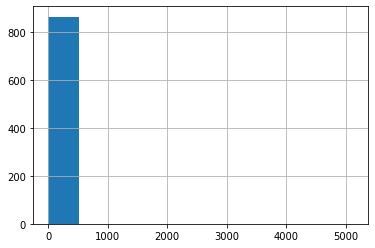

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count